In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [44]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

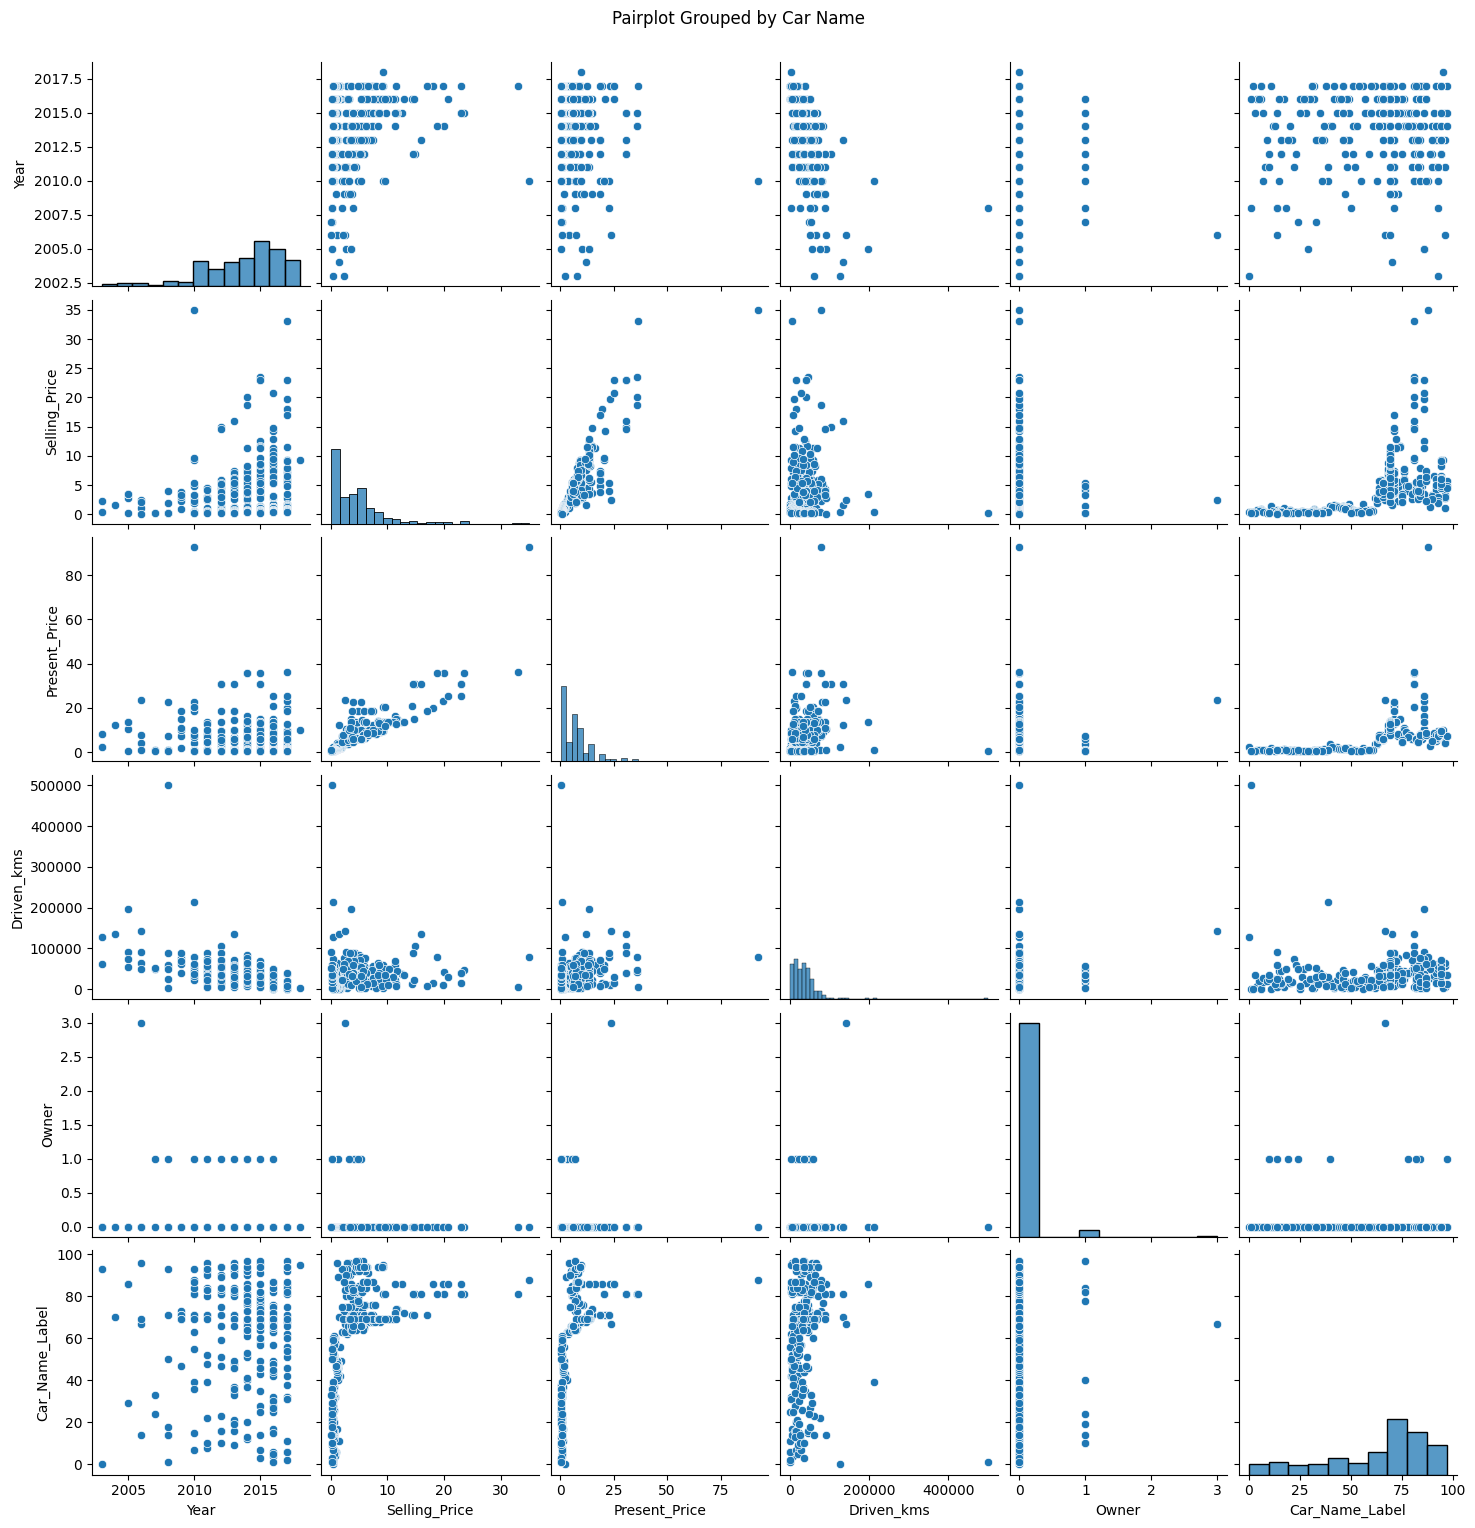

In [45]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
df_encoded['Car_Name_Label'] = LabelEncoder().fit_transform(df['Car_Name'])
sns.pairplot(df_encoded)
plt.suptitle('Pairplot Grouped by Car Name', y=1.02)
plt.show()

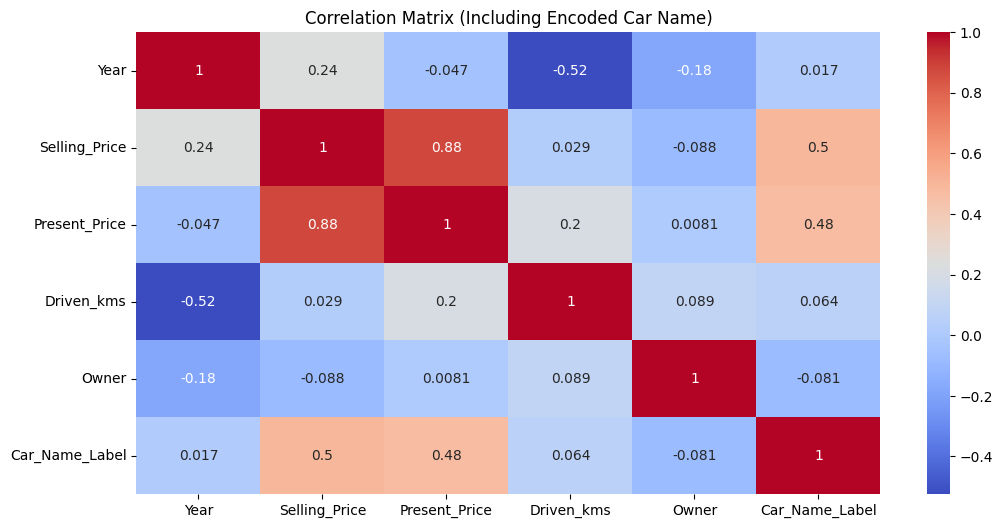

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Encoded Car Name)')
plt.show()

In [47]:
df_encoded = pd.get_dummies(df, drop_first=True) #converts categorical variables into 0/1

In [48]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [49]:
print(X)

     Year  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0    2014           5.59       27000      0               False   
1    2013           9.54       43000      0               False   
2    2017           9.85        6900      0               False   
3    2011           4.15        5200      0               False   
4    2014           6.87       42450      0               False   
..    ...            ...         ...    ...                 ...   
296  2016          11.60       33988      0               False   
297  2015           5.90       60000      0               False   
298  2009          11.00       87934      0               False   
299  2017          12.50        9000      0               False   
300  2016           5.90        5464      0               False   

     Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                 False                   False                       False   
1                 False              

In [50]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [53]:
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression R² Score: 0.5997023481240091


In [54]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [55]:
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Random Forest R² Score: 0.9640806063420801


In [56]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Linear Regression MSE: 9.22109039306311
Random Forest MSE: 0.827424228524591


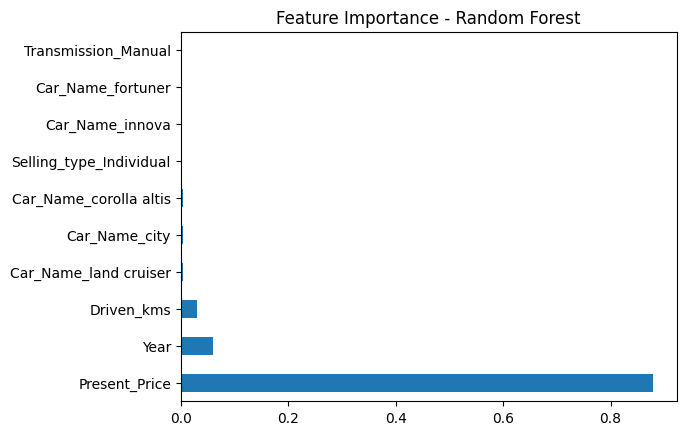

In [57]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.show()